In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
GLASSNODE_CSV = '../datasets/glassnode/csv/dataset.csv'

def unix_time_to_date(x): return pd.to_datetime(x, unit='s')
data = pd.read_csv(GLASSNODE_CSV, parse_dates=['Timestamp'], date_parser=unix_time_to_date, index_col='Timestamp')

In [4]:
data.columns

Index(['new-addresses', 'utx-os-created', 'transaction-size-total',
       'transaction-rate', 'total-addresses', 'circulating-supply',
       'utxo-value-spent-mean', 'utxo-value-spent-total', 'sopr',
       'transaction-size-mean', 'block-interval-mean', 'sending-addresses',
       'utxo-value-created-total', 'transfer-volume-median', 'blocks-mined',
       'active-addresses', 'market-cap', 'receiving-addresses',
       'utxo-value-spent-median', 'fees-total', 'daysTillHalving', 'ratio',
       'block-interval-median', 'utx-os-spent', 'block-size-mean',
       'utxo-value-created-mean', 'transfer-volume-total', 'fees-mean',
       'transfer-volume-mean', 'transaction-count', 'price-drawdown-from-ath',
       'block-size-total'],
      dtype='object')

In [6]:
def load_glassnode_json():
    filepath = '~/Downloads/issuance.json'
    df0 = pd.read_json(filepath, orient='records', precise_float=True, convert_dates=['t'])
    # Sets the index
    df0.rename(columns={'t': 'Timestamp'}, inplace=True)
    df0.set_index('Timestamp', inplace=True)
    # Change column name
    if 'v' in df0.columns:
        df0.rename(columns={'v': 'issuance'}, inplace=True)
    else:
        columns = df0['o'][0].keys()
        for c in columns:
            df0[[c]] = df0['o'].map(lambda d: d[c])
        df0.drop(['o'], axis=1, inplace=True)
    return df0

data = load_glassnode_json()

In [7]:
data

,issuance
Timestamp,
2009-01-03 00:00:00+00:00,50.0
2009-01-04 00:00:00+00:00,0.0
2009-01-05 00:00:00+00:00,0.0
2009-01-06 00:00:00+00:00,0.0
2009-01-07 00:00:00+00:00,0.0
...,...
2020-04-05 00:00:00+00:00,2187.5
2020-04-06 00:00:00+00:00,1600.0
2020-04-07 00:00:00+00:00,2100.0


In [12]:
data['issued_btc'] = data['issuance'].cumsum()

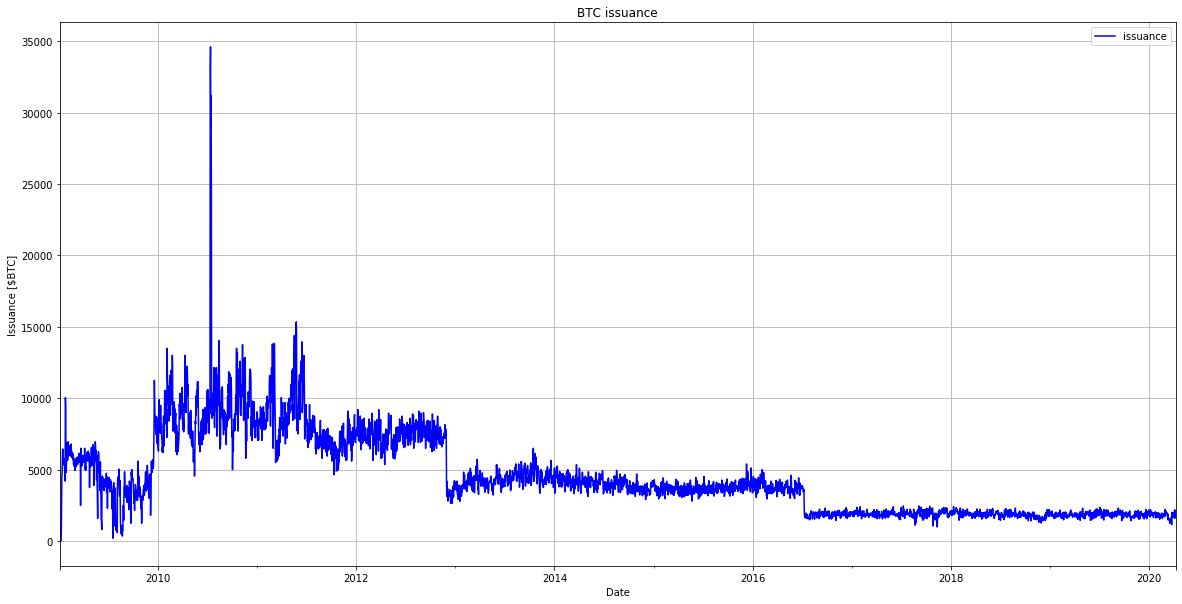

In [17]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
data.plot(kind='line',y='issuance', color='blue', ax=ax)
plt.title('BTC issuance')
plt.ylabel('Issuance [$BTC]')
plt.xlabel('Date')
plt.grid()
plt.show()

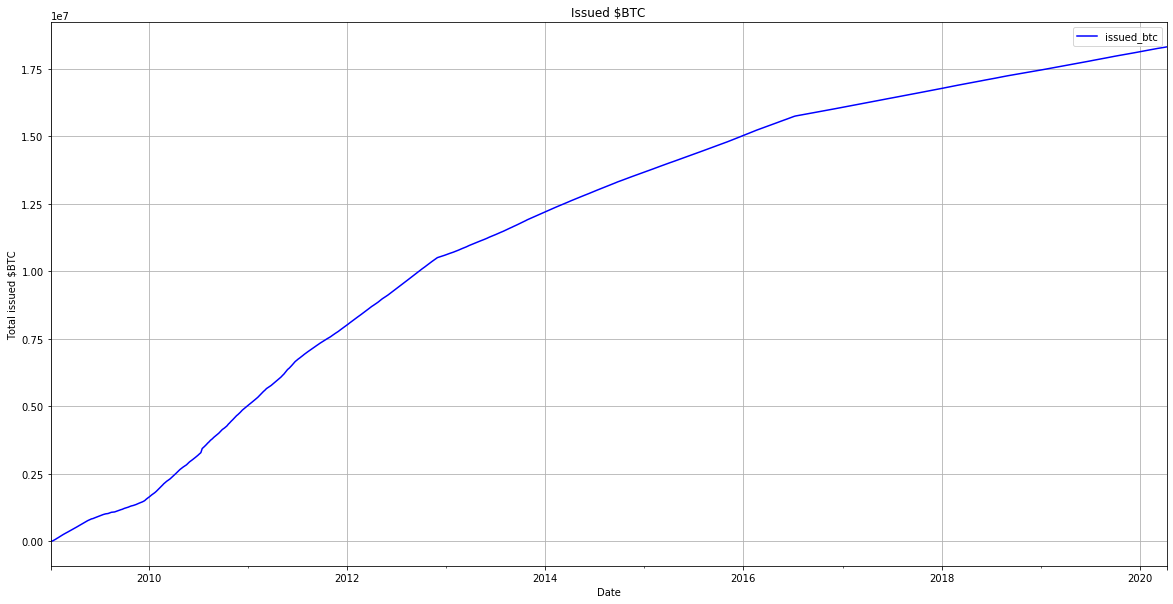

In [18]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
data.plot(kind='line',y='issued_btc', color='blue', ax=ax)
plt.title('Issued $BTC')
plt.ylabel('Total issued $BTC')
plt.xlabel('Date')
plt.grid()
plt.show()

In [73]:
def load_glassnode_json():
    filepath = '~/Downloads/stock-to-flow-ratio.json'
    df0 = pd.read_json(filepath, orient='records', precise_float=True, convert_dates=['t'])
    # Sets the index
    df0.rename(columns={'t': 'Timestamp'}, inplace=True)
    df0.set_index('Timestamp', inplace=True)
    # Change column name
    if 'v' in df0.columns:
        df0.rename(columns={'v': 'stock-to-flow'}, inplace=True)
    else:
        df0['ratio'] = df0['o'].apply(lambda x: x['ratio'])
        df0['daysTillHalving'] = df0['o'].apply(lambda x: x['daysTillHalving'])
        df0.drop(['o'], axis=1, inplace=True)
    return df0

data = load_glassnode_json()

In [74]:
data.loc[data['daysTillHalving'] == 1]

,ratio,daysTillHalving
Timestamp,,
2012-11-27 00:00:00+00:00,1.037699e+01,1
2016-07-08 00:00:00+00:00,4.524841e+02,1
2020-05-10 00:00:00+00:00,8.575272e+03,1
2024-04-27 00:00:00+00:00,1.221042e+05,1
2028-04-13 00:00:00+00:00,1.407828e+06,1


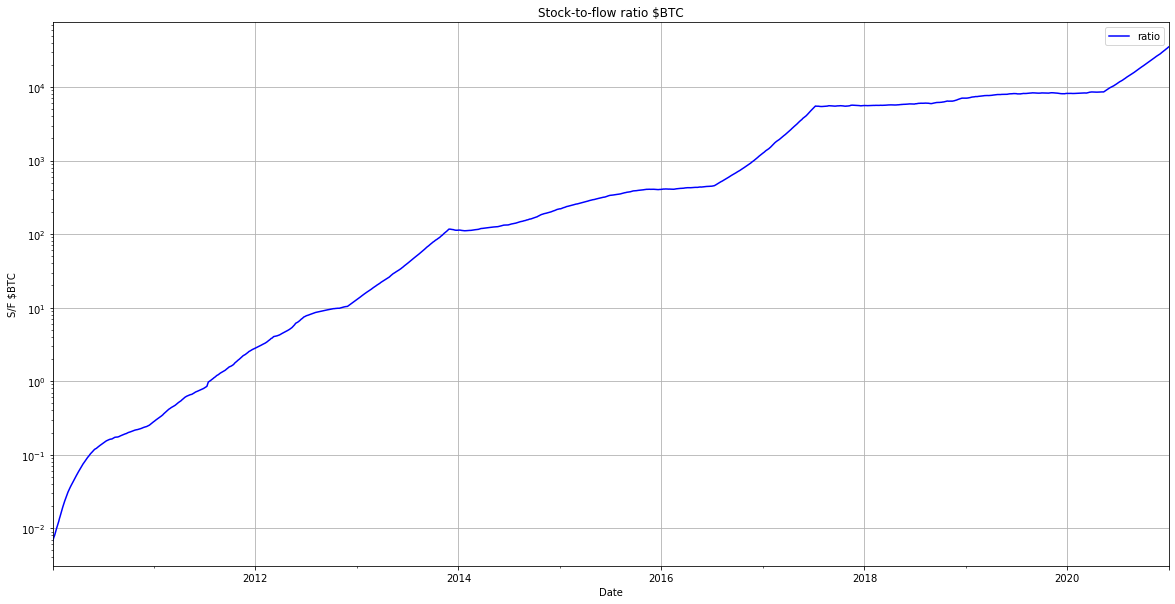

In [75]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
data.loc[:pd.datetime(year=2020,month=12,day=31)].plot(kind='line',y='ratio', color='blue', ax=ax)
plt.title('Stock-to-flow ratio $BTC')
plt.ylabel('S/F $BTC')
plt.xlabel('Date')
plt.yscale('log')
plt.grid()
plt.show()

In [76]:
def data_paths_from_periodicity(periodicity):
    if periodicity == 'hourly':
        return ['../datasets/bitstamp_data_hourly.csv']
    elif periodicity == 'daily':
        return ['../datasets/bitstamp_data_daily.csv']
    return ['../datasets/bitstamp_data.csv.part1',
            '../datasets/bitstamp_data.csv.part2',
            '../datasets/bitstamp_data.csv.part3',
            '../datasets/bitstamp_data.csv.part4',
            '../datasets/bitstamp_data.csv.part5']


def load_btc_data(periodicity):
    file_paths = data_paths_from_periodicity(periodicity)
    # Función que permite convertir el formato de las fechas como unix time
    # en un objeto de fecha.
    def unix_time_to_date(x): return pd.to_datetime(x, unit='s')
    li = []
    for filename in file_paths:
        df = pd.read_csv(filename, parse_dates=[
                         'Timestamp'], date_parser=unix_time_to_date, index_col='Timestamp')
        li.append(df)
    return pd.concat(li, axis=0)

btc_price = load_btc_data('daily')

In [77]:
btc_price

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2011-12-30 03:00:00,4.39,4.58,4.39,4.58,95.317878,4.253203e+02
2011-12-31 03:00:00,4.58,5.00,4.58,5.00,21.602000,1.057792e+02
2012-01-01 03:00:00,5.00,5.00,5.00,5.00,19.048000,9.524000e+01
2012-01-02 03:00:00,5.32,5.32,5.14,5.29,88.037281,4.648052e+02
2012-01-03 03:00:00,4.93,5.57,4.93,5.57,107.233260,5.680762e+02
...,...,...,...,...,...,...
2020-12-26 03:00:00,26472.89,28377.94,25770.00,26259.60,13234.334129,3.584020e+08
2020-12-27 03:00:00,26242.82,27473.49,26079.60,27037.91,7987.777611,2.153717e+08
2020-12-28 03:00:00,27037.90,27395.00,25831.85,27370.00,9577.278292,2.552738e+08


In [80]:
df = pd.merge_asof(btc_price['Close'], data, left_index=True, right_index=True, tolerance=pd.Timedelta("11h"))

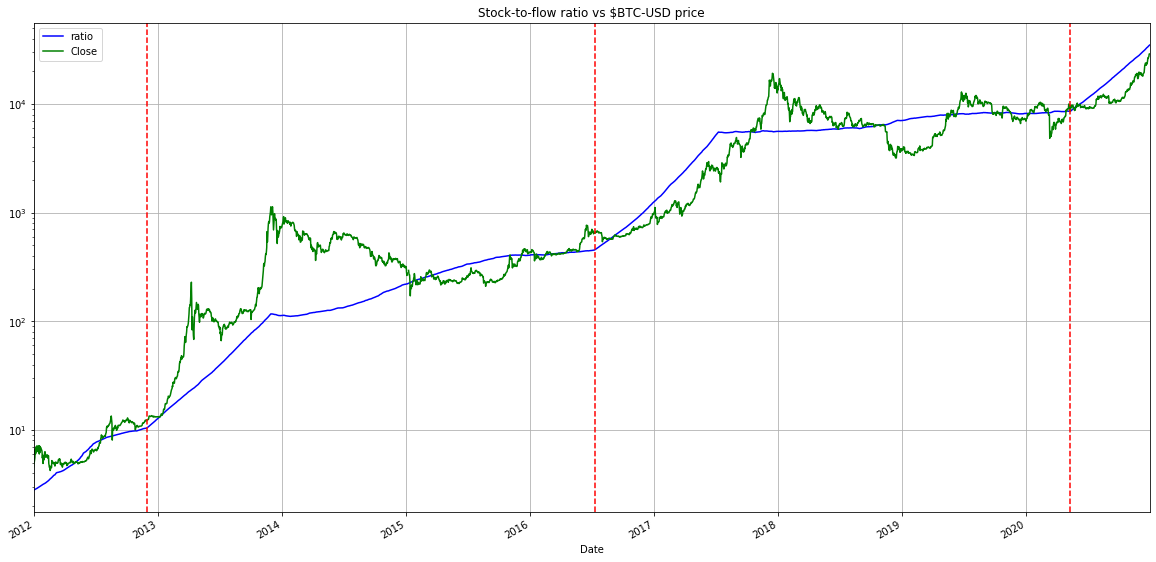

In [84]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
df.plot(kind='line',y='ratio', color='blue', ax=ax)
df.plot(kind='line',y='Close', color='green', ax=ax)
ax.axvline(pd.datetime(year=2012, month=11, day=28), ls='--', color='r')
ax.axvline(pd.datetime(year=2016, month=7, day=9), ls='--', color='r')
ax.axvline(pd.datetime(year=2020, month=5, day=11), ls='--', color='r')
plt.title('Stock-to-flow ratio vs $BTC-USD price')
plt.xlabel('Date')
plt.yscale('log')
plt.grid()
plt.show()